# The Assignment 

For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- 1. Do smokers have higher insurance charges than non-smokers?
- 2. Are men more likely to smoke than women?
- 3. Do different regions have different charges, on average?



For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result


## Imports

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

## Load Data

In [2]:
df = pd.read_csv("Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### 1.  Do smokers have higher insurance charges than non-smokers?

#### Define Null and Alternative Hypotheses

**Null Hypothesis:**  There is no significant difference between smokers insurance charges and non-smokers.  

**Alternative Hypothesis:**  Smokers have significantly higher insurance charges than non-smokers.

#### Select Proper Hypothesis Test

- We are comparing charges (numerical) between two different groups of people (smokers 
  vs. non smokers)
- The appropriate test to perform would be:
    - Independent t-test (2-sample) have the following Assumptions:
        - No significant outliers
        - Normality
        - Equal Variance

#### Getting the Group Data

In [4]:
df['smoker'].unique

<bound method Series.unique of 0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object>

In [5]:
smoker_charges = df.loc[df['smoker']=='yes', ['charges', 'smoker']]
smoker_charges

,charges,smoker
0,16884.92400,yes
11,27808.72510,yes
14,39611.75770,yes
19,36837.46700,yes
23,37701.87680,yes
...,...,...
1313,36397.57600,yes
1314,18765.87545,yes
1321,28101.33305,yes
1323,43896.37630,yes


In [6]:
nonsmoker_charges = df.loc[df['smoker']=='no', ['charges', 'smoker']]
nonsmoker_charges

,charges,smoker
1,1725.55230,no
2,4449.46200,no
3,21984.47061,no
4,3866.85520,no
5,3756.62160,no
...,...,...
1332,11411.68500,no
1333,10600.54830,no
1334,2205.98080,no
1335,1629.83350,no


In [7]:
print(f"{len(smoker_charges)} smokers insurance charges." )
print(f"{len(nonsmoker_charges)} non smokers insurance charges." )

274 smokers insurance charges.
1064 non smokers insurance charges.


#### Visualize Group Means

In [8]:
plot_df = pd.concat([smoker_charges, nonsmoker_charges], axis=0)
plot_df

,charges,smoker
0,16884.9240,yes
11,27808.7251,yes
14,39611.7577,yes
19,36837.4670,yes
23,37701.8768,yes
...,...,...
1332,11411.6850,no
1333,10600.5483,no
1334,2205.9808,no
1335,1629.8335,no


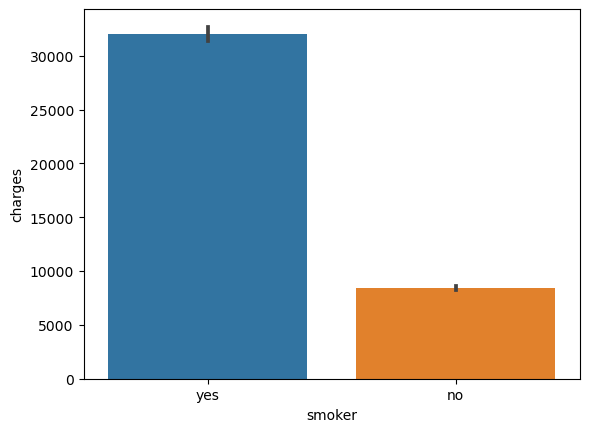

In [9]:
## visualizing means. ci=68 makes easier to compare error bars (will discuss in class)
ax = sns.barplot(data=plot_df, x='smoker', y='charges', errorbar=('ci', 68))

In [10]:
## now that we have visualized the groups, we can save a final male_group and female_group
# that are a pandas Series. This will make the rest of our workflow simpler than if 
# we still had a dataframe

smoker_group = smoker_charges['charges']
nonsmoker_group = nonsmoker_charges['charges']
display(smoker_group.head(), nonsmoker_group.head())

0     16884.9240
11    27808.7251
14    39611.7577
19    36837.4670
23    37701.8768
Name: charges, dtype: float64

1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
5     3756.62160
Name: charges, dtype: float64

#### Testing Assumptions 
- According the the work flow, the 2-sample T-Test has the following assumptions:
    - No significant outliers
    - Normality
    - Equal Variance

**Checking for Outliers**
- Check each group SEPARATELY!

In [11]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_smokers = np.abs(stats.zscore(smoker_group)) > 3
print(f"There are {is_outlier_smokers.sum()} outliers in the smoker group out of {len(smoker_group)})")

There are 0 outliers in the smoker group out of 274)


In [12]:
## Checking for abs vlaue of z-scores that are > 3
is_outlier_nonsmokers = np.abs(stats.zscore(nonsmoker_group)) > 3
print(f"There are {is_outlier_nonsmokers.sum()} outliers in the male group of out of {len(nonsmoker_group)}.")

There are 24 outliers in the male group of out of 1064.


In [13]:
## removing outliers from nonsmoker_group
nonsmoker_group = nonsmoker_group.loc[~is_outlier_nonsmokers]
nonsmoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

**Checking for Normality**
- According to the workflow on the LP, since both groups have n > 15, we can safely ignore the assumption of normality.

**Checking for Equal Variance**

In [14]:
result = stats.levene(smoker_group, nonsmoker_group)
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)
True


- According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do NOT have equal variance.

- Since we did NOT meet the assumption of equal variance, we will run our stats.ttest_ind using equal_var=False. This will run a Welch's T-Test, which is designed to account for unequal variance.

#### Statistical Test

In [15]:
result = stats.ttest_ind(smoker_group, nonsmoker_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

#### Interpret your p-value and reject or fail to reject your null hypothesis

- Our Welch's T-Test return a p-value < alpha (0.05) we reject the null hypothesis and support the alternative hypothesis that there is a significant difference in insurance charges for smokers vs non smokers.  

- In order to know if the insurance charges are significantly MORE or LESS, we look at the actual means of our final groups.

In [16]:
print(f"The average insurance charges for smoker group was {smoker_group.mean():.2f}")
print(f"The average insurance charges for non smoker group was {nonsmoker_group.mean():.2f}")

The average insurance charges for smoker group was 32050.23
The average insurance charges for non smoker group was 7939.86


- The average insurance charges for smoker group was significantly higher than non smokers.  

### 2. Are men more likely to smoke than women?

Define Null and Alternative Hypotheses

**Null Hypothesis:** There is no significant difference in smoking between men and women. There is no association/correlation between the variables. 

**Alternative Hypothesis:** There is a significant difference in smoking between men and women. (Men are more likely to smoke than women).

- Select Proper Hypothesis Test
    - We are comparing smoking (categorical) between 2 different groups(men & women)
        - The appropriate test to perform would be:
            - Chi-Square:
                - There are two categorical variables (ordinal or nominal)
                - The outcomes are independent.

#### Getting the group data

In [17]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

#### Getting the Contingency Table 

In [18]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


#### Statistical Test

In [19]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results

#### Interpret p-value and reject or fail to reject your null hypothesis

In [20]:
# Display p-value and check against alpha
print(p)
p<.05

0.006548143503580696


True

- The p-value is less than 0.05, so we have a significant result.

- Since the p-value < .05, we reject the null hypothesis that there is no relationship between sex and likelihood of being a smoker.

- This means that we accept the alternate hypothesis and conclude that men are more likely to smoke than women.

#### Visualization
    

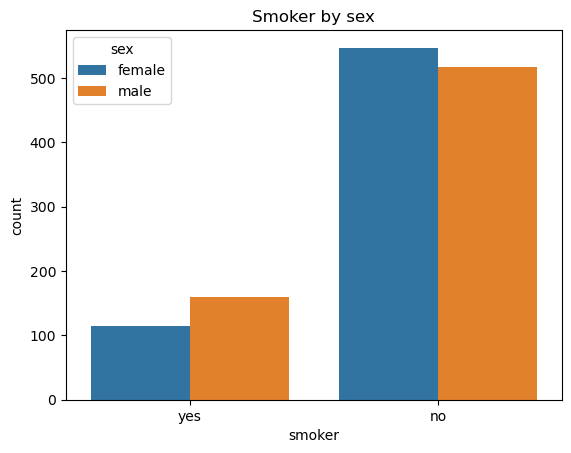

In [21]:
ax = sns.countplot(data=df, x='smoker', hue='sex')

# Add title to the plot
ax.set_title('Smoker by sex');

### 3. Do different regions have different charges, on average?

#### **Define Null and Alternative Hypotheses**

**Null Hypothesis:** There is no significant difference in insurance charges between the regions.  All group's means are the same.

**Alternative Hypothesis:** There is a significantly difference in insurance charges between the regions.  There is a difference in the group's means

#### **Select Proper Hypothesis Test**
- We are comparing charges (numerical) between four different regions/groups 
    - The appropriate test to perform would be:
        - One Way ANOVA have the following Assumptions:
            - No significant outliers
            - Normality
            - Equal Variance

#### **Separating our Groups**

In [22]:
## Create groups dictionary. 
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### Testing Assumptions

**Assumption of Normality**

In [23]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [24]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- These regions are all significantly different from each other. 

**Testing Assumption of Equal Variance**

In [25]:
# with the * operator 
result = stats.levene(*groups.values())
print(result)
print(result.pvalue<.05)

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)
True


- According to the documentation for stats.levene, the null hypothesis for the test is that both groups have equal variance. Since our p-value is less than .05 we reject that null hypothesis and conclude that our groups do NOT have equal variance.


#### Statistical Test

- **Since we do not meet the Equal Variance Assumption we need to do the Non-Parametric Test Equivalent.**

In [26]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *groups.values())
print(result)
print(result.pvalue<.05)

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)
False


#### Interpret p-value and reject or fail to reject your null hypothesis

- We fail to reject the null hypothesis.  The regions do not have significant difference in insurance charges. 

#### Visualize Group Means

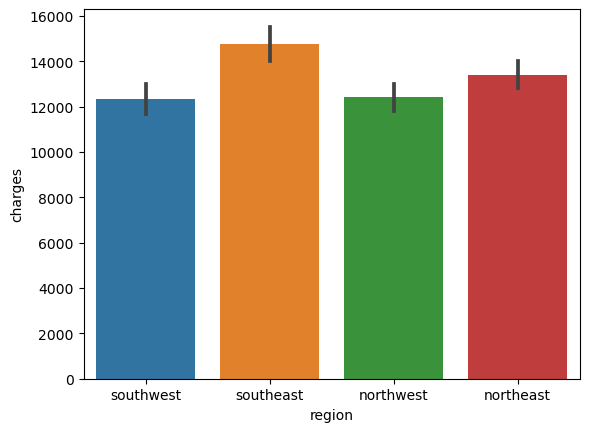

In [27]:
## visualizing means. ci=68 makes easier to compare error bars 
ax = sns.barplot(data=df, x='region', y='charges', errorbar=('ci', 68))